<a href="https://colab.research.google.com/github/Rohan171819/Deep_Learning./blob/main/Dropout_Layers_Regression_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
Data=pd.read_csv("/content/Bank Customer Churn Prediction.csv")

In [ ]:
Data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# One Hot Encoding...
Data=pd.get_dummies(Data,columns=["country","gender"],drop_first=True)

In [ ]:
Data.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [ ]:
X=Data.drop(columns=["churn"])
Y=Data[["churn"]]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,test_size=0.2)
print(X_train.shape)
print(Y_train.shape)

(8000, 12)
(8000, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train_scaled=scale.fit_transform(X_train)
X_test_scaled=scale.fit_transform(X_test)

In [ ]:
print(X_train_scaled.shape)

(8000, 12)


In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

# Without Dropout Layers..

In [ ]:
# Creating the ANN Architecture..
model=Sequential()
# Creating 3 Nodes in the Hidden Layer and Adding Input data..
model.add(Dense(10,activation="relu",input_dim=12))
model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))

#Creating 1 Node in the Output Layer..
model.add(Dense(1,activation="linear"))

In [ ]:
# Analyzing the summary of the Neural Network.
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                130       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling my model..
model.compile(loss="mean_squared_error",optimizer="Adam",metrics=["accuracy"])

In [ ]:
# Training the Neural Network..
history=model.fit(X_train_scaled,Y_train,epochs=500,validation_split=0.2)

Epoch 1/500
200/200 [==============================] - 2s 6ms/step - loss: 0.1073 - accuracy: 0.8587 - val_loss: 0.1011 - val_accuracy: 0.8675
Epoch 2/500
200/200 [==============================] - 1s 4ms/step - loss: 0.1062 - accuracy: 0.8586 - val_loss: 0.1009 - val_accuracy: 0.8681
Epoch 3/500
200/200 [==============================] - 1s 4ms/step - loss: 0.1059 - accuracy: 0.8589 - val_loss: 0.1009 - val_accuracy: 0.8681
Epoch 4/500
200/200 [==============================] - 1s 4ms/step - loss: 0.1057 - accuracy: 0.8587 - val_loss: 0.1009 - val_accuracy: 0.8687
Epoch 5/500
200/200 [==============================] - 1s 4ms/step - loss: 0.1055 - accuracy: 0.8606 - val_loss: 0.1011 - val_accuracy: 0.8706
Epoch 6/500
200/200 [==============================] - 1s 4ms/step - loss: 0.1053 - accuracy: 0.8602 - val_loss: 0.1010 - val_accuracy: 0.8681
Epoch 7/500
200/200 [==============================] - 1s 4ms/step - loss: 0.1052 - accuracy: 0.8587 - val_loss: 0.1010 - val_accuracy: 0.8669

In [ ]:
# Prediction of Neural Network..
Y_Predicted=model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [ ]:
# Calulating the accuracy..
from sklearn.metrics import r2_score
r2_score(Y_test,Y_Predicted)

0.23627662029313357

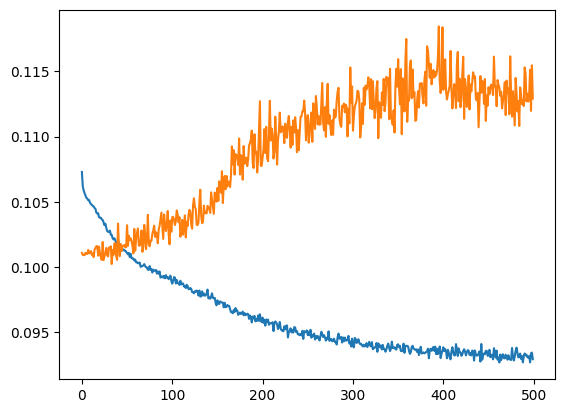

In [ ]:
# Plotting the graph of loss..
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

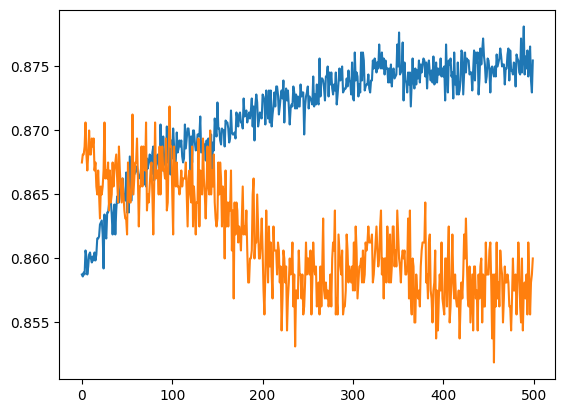

In [ ]:
# Plotting the graph of accuracy..
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()

# With Dropout Layers

In [ ]:
# Creating the ANN Architecture..
model=Sequential()
# Creating 3 Nodes in the Hidden Layer and Adding Input data..
model.add(Dense(10,activation="relu",input_dim=12))
model.add(Dropout(0.5))
model.add(Dense(10,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="relu"))
model.add(Dropout(0.5))
#Creating 1 Node in the Output Layer..
model.add(Dense(1,activation="linear"))

In [ ]:
# Analyzing the summary of the Neural Network.
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                130       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_11 (Dense)            (None, 10)                110       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_12 (Dense)            (None, 1)                

In [ ]:
# Compiling my model..
model.compile(loss="mean_squared_error",optimizer="Adam",metrics=["accuracy"])

In [ ]:
# Training the Neural Network..
history=model.fit(X_train_scaled,Y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 3s 5ms/step - loss: 0.5711 - accuracy: 0.6988 - val_loss: 0.1689 - val_accuracy: 0.7962
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 0.2372 - accuracy: 0.7559 - val_loss: 0.1637 - val_accuracy: 0.7962
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 0.1912 - accuracy: 0.7728 - val_loss: 0.1629 - val_accuracy: 0.7962
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 0.1770 - accuracy: 0.7853 - val_loss: 0.1620 - val_accuracy: 0.7962
Epoch 5/100
200/200 [==============================] - 1s 5ms/step - loss: 0.1709 - accuracy: 0.7867 - val_loss: 0.1620 - val_accuracy: 0.7962
Epoch 6/100
200/200 [==============================] - 1s 5ms/step - loss: 0.1675 - accuracy: 0.7887 - val_loss: 0.1620 - val_accuracy: 0.7962
Epoch 7/100
200/200 [==============================] - 1s 4ms/step - loss: 0.1654 - accuracy: 0.7906 - val_loss: 0.1620 - val_accuracy: 0.7962

In [ ]:
# Prediction of Neural Network..
Y_Predicted=model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [ ]:
# Calulating the accuracy..
from sklearn.metrics import r2_score
r2_score(Y_test,Y_Predicted)

0.19702797439274577

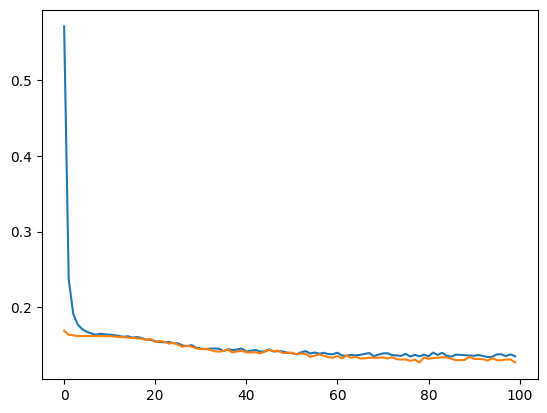

In [ ]:
# Plotting the graph of loss..
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

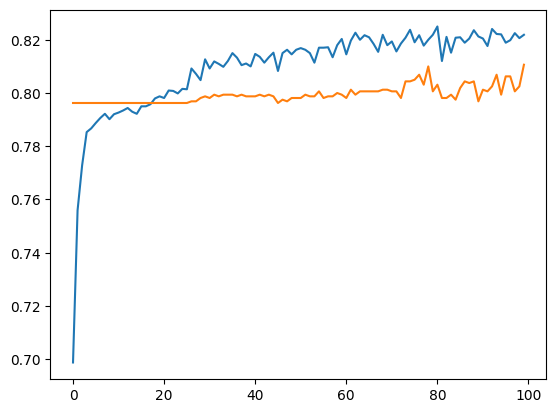

In [ ]:
# Plotting the graph of accuracy..
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()